<a href="https://colab.research.google.com/github/JRose31/Convolutional-Neural-Network---Keras/blob/main/Deep_Learning_Image_Recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Deep Learning
## ***Image Recognition with Keras***

### **Problem Definition**

Build a Deep Learning model that is able to classify images of cats and dogs.

### **Imports & Authentication**

In [ ]:
import tensorflow.keras as keras
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pickle

In [ ]:
from google.colab import drive
drive.mount('/drive')

Drive already mounted at /drive; to attempt to forcibly remount, call drive.mount("/drive", force_remount=True).


### **Loading Data**

Define file path.

In [ ]:
file_pathX, file_pathy = ['/drive/My Drive/Student Folder - Jamaine/Projects/Project 6/Data/Copy of X.pickle',
                          '/drive/My Drive/Student Folder - Jamaine/Projects/Project 6/Data/Copy of y.pickle']

Read in pickle file in a numpy array.

In [ ]:
dataX, datay = np.array(pickle.load(open(file_pathX,'rb'))), np.array(pickle.load(open(file_pathy, 'rb')))

Scale X vlaues.

In [ ]:
dataX_scaled = dataX/255

### **Exploratory Data Aanalysis**

Confirm array shapes.

In [ ]:
print(f"X: {dataX.shape}\ny: {datay.shape})")
dataX.shape == dataX_scaled.shape

X: (24946, 100, 100, 1)
y: (24946,))


True

Compare a sample response and the cooresponding image.

1


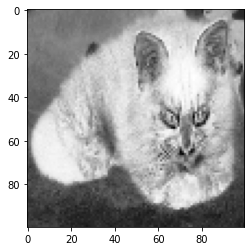

In [ ]:
print(datay[1])
plt.imshow(dataX_scaled[1].squeeze(), cmap=plt.cm.binary)
plt.show()

0


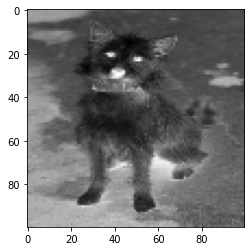

In [ ]:
print(datay[0])
plt.imshow(dataX_scaled[0].squeeze(), cmap=plt.cm.binary)
plt.show()

<style>
table {float:left}
</style>

| Dogs | Cats |
|------|------|
|0|1|

### **Data Processing**

Split data into training and testing sets.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(dataX_scaled, datay, test_size=0.25, random_state=42)

Initialize model and build Neural Network.

In [ ]:
model = Sequential()

# Define input layer & first hidden layer
model.add(Conv2D(64, (3,3), input_shape=(100,100,1), activation = 'relu'))
model.add(MaxPooling2D(pool_size=(2,2))) 

# Define second hidden layer
model.add(Conv2D(64, (3,3), activation = 'relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

# Define third hidden layer
model.add(Conv2D(64, (3,3), activation = 'relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

# Define fourth hidden layer
model.add(Conv2D(64, (3,3), activation = 'relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

# Flatten data to be used in output layer
model.add(Flatten())

# Define output layer
model.add(Dense(1, activation = 'sigmoid'))

# Compile model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])       

# Fit model
model.fit(X_train, y_train, epochs=3)

Epoch 1/3
585/585 [==============================] - 6s 9ms/step - loss: 0.6497 - accuracy: 0.6135
Epoch 2/3
585/585 [==============================] - 5s 9ms/step - loss: 0.5480 - accuracy: 0.7202
Epoch 3/3
585/585 [==============================] - 5s 9ms/step - loss: 0.4642 - accuracy: 0.7792


Test model.

In [ ]:
val_loss, val_acc = model.evaluate(X_test, y_test)
print(val_loss)
print(val_acc)

195/195 [==============================] - 1s 4ms/step - loss: 0.4548 - accuracy: 0.7943
0.45484843850135803
0.794292151927948


#### **Tuning Hyperparameters**

Create a dictionary to house parameters for each iteration.

In [ ]:
params = {'filter':[60, 66, 72, 78],
          'activation':['relu', 'relu', 'relu', 'relu' ],
          'optimizer':['adam', 'adamax', 'adadelta', 'nadam']}

Create function that test models using the parameters stored in the dictionary.

In [ ]:
def pet_model(X_train, X_test, y_train, y_test, params):

  # Initialize DataFrame to store model results
  results = pd.DataFrame({'Iteration': [],
                          'Loss': [],
                          'Accuracy': [], 
                          'Filter': [],
                          'Activation Func': [],
                          'Optimizer': []})
  
  for idx in range(len(params['filter'])):
    
    model = Sequential()

    # Define input layer & first hidden layer
    model.add(Conv2D(params['filter'][idx], (3,3), input_shape=(100,100,1), activation = params['activation'][idx]))
    model.add(MaxPooling2D(pool_size=(2,2))) 

    # Define second hidden layer
    model.add(Conv2D(params['filter'][idx], (3,3), activation = params['activation'][idx]))
    model.add(MaxPooling2D(pool_size=(2,2)))

    # Define third hidden layer
    model.add(Conv2D(params['filter'][idx], (3,3), activation = params['activation'][idx]))
    model.add(MaxPooling2D(pool_size=(2,2)))

    # Define fourth hidden layer
    model.add(Conv2D(params['filter'][idx], (3,3), activation = params['activation'][idx]))
    model.add(MaxPooling2D(pool_size=(2,2)))

    # Flatten data to be used in output layer
    model.add(Flatten())

    # Define output layer
    model.add(Dense(1, activation = 'sigmoid'))

    # Compile model
    model.compile(optimizer= params['optimizer'][idx], loss='binary_crossentropy', metrics=['accuracy'])       

    # Fit model
    model.fit(X_train, y_train, epochs=3)

    # Evaluate model
    val_loss, val_acc = model.evaluate(X_test, y_test)

    # Add models results to DataFrame
    results = results.append({'Iteration':idx,
                    'Loss': val_loss,
                    'Accuracy': val_acc,
                    'Filter': params['filter'][idx],
                    'Activation Func': params['activation'][idx],
                    'Optimizer': params['optimizer'][idx]}, ignore_index=True)
    
  # Sort and return completed DataFrame of model performance and parameters  
  results = results.sort_values(by='Accuracy', ascending=False)
  return results

Run function with training data, testing data, and specified hyperparameters.

In [ ]:
pet_cnn = pet_model(X_train, X_test, y_train, y_test, params)

Epoch 1/3
585/585 [==============================] - 6s 9ms/step - loss: 0.6388 - accuracy: 0.6248
Epoch 2/3
585/585 [==============================] - 5s 9ms/step - loss: 0.5120 - accuracy: 0.7491
Epoch 3/3
195/195 [==============================] - 1s 4ms/step - loss: 0.4045 - accuracy: 0.8227
Epoch 1/3
585/585 [==============================] - 7s 11ms/step - loss: 0.6535 - accuracy: 0.6051
Epoch 2/3
585/585 [==============================] - 6s 11ms/step - loss: 0.5586 - accuracy: 0.7116
Epoch 3/3
195/195 [==============================] - 1s 5ms/step - loss: 0.4867 - accuracy: 0.7723
Epoch 1/3
585/585 [==============================] - 7s 11ms/step - loss: 0.6930 - accuracy: 0.5025
Epoch 2/3
585/585 [==============================] - 7s 11ms/step - loss: 0.6928 - accuracy: 0.5020
Epoch 3/3
195/195 [==============================] - 1s 5ms/step - loss: 0.6928 - accuracy: 0.4961
Epoch 1/3
585/585 [==============================] - 8s 12ms/step - loss: 0.6189 - accuracy: 0.6467
Epoch

Analyze models.

In [ ]:
pet_cnn

,Iteration,Loss,Accuracy,Filter,Activation Func,Optimizer
3,3.0,0.372731,0.835979,78.0,relu,nadam
0,0.0,0.404463,0.822671,60.0,relu,adam
1,1.0,0.486694,0.772326,66.0,relu,adamax
2,2.0,0.692828,0.496072,72.0,relu,adadelta


#### **Train w/ optimal parameters**

Train model with best performing parameters.

In [ ]:
best_filter = pet_cnn['Filter'].iloc[0]
best_acc = pet_cnn['Activation Func'].iloc[0]
best_opt = pet_cnn['Optimizer'].iloc[0]

In [ ]:
fmodel = Sequential()

# Define input layer & first hidden layer
fmodel.add(Conv2D(best_filter, (3,3), input_shape=(100,100,1), activation = best_acc))
fmodel.add(MaxPooling2D(pool_size=(2,2))) 

# Define second hidden layer
fmodel.add(Conv2D(best_filter, (3,3), activation = best_acc))
fmodel.add(MaxPooling2D(pool_size=(2,2)))

# Define third hidden layer
fmodel.add(Conv2D(best_filter, (3,3), activation = best_acc))
fmodel.add(MaxPooling2D(pool_size=(2,2)))

# Define fourth hidden layer
fmodel.add(Conv2D(best_filter, (3,3), activation = best_acc))
fmodel.add(MaxPooling2D(pool_size=(2,2)))

# Flatten data to be used in output layer
fmodel.add(Flatten())

# Define output layer
fmodel.add(Dense(1, activation = 'sigmoid'))

# Compile model
fmodel.compile(optimizer=best_opt, loss='binary_crossentropy', metrics=['accuracy'])       

# Fit model
fmodel.fit(X_train, y_train, epochs=12)

Epoch 1/12
585/585 [==============================] - 8s 12ms/step - loss: 0.6392 - accuracy: 0.6264
Epoch 2/12
585/585 [==============================] - 7s 12ms/step - loss: 0.4969 - accuracy: 0.7625
Epoch 3/12
585/585 [==============================] - 7s 12ms/step - loss: 0.4086 - accuracy: 0.8125
Epoch 4/12
585/585 [==============================] - 7s 12ms/step - loss: 0.3445 - accuracy: 0.8485
Epoch 5/12
585/585 [==============================] - 7s 12ms/step - loss: 0.2907 - accuracy: 0.8747
Epoch 6/12
585/585 [==============================] - 7s 12ms/step - loss: 0.2465 - accuracy: 0.8969
Epoch 7/12
585/585 [==============================] - 7s 12ms/step - loss: 0.2065 - accuracy: 0.9158
Epoch 8/12
585/585 [==============================] - 7s 12ms/step - loss: 0.1673 - accuracy: 0.9334
Epoch 9/12
585/585 [==============================] - 7s 12ms/step - loss: 0.1275 - accuracy: 0.9516
Epoch 10/12
585/585 [==============================] - 7s 12ms/step - loss: 0.1000 - accura

Evaluate model.

In [ ]:
val_loss, val_acc = fmodel.evaluate(X_test, y_test)
print(val_loss)
print(val_acc)

195/195 [==============================] - 1s 5ms/step - loss: 0.5414 - accuracy: 0.8595
0.5413568615913391
0.8595478534698486


### **Test CNN**

Create a function to prepare images as data.

In [ ]:
import cv2 

def prepare(filepath):
    IMG_SIZE = 100
    img_array = cv2.imread(filepath, cv2.IMREAD_GRAYSCALE)
    new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
    return new_array.reshape(-1, IMG_SIZE, IMG_SIZE, 1)

Create function to run prediction on images passed as a filepath.

In [ ]:
def sample_predict(file):
  data = prepare(file)
  class_pred = (fmodel.predict(data) > 0.5).astype("int32")
  return 'Dog' if class_pred[0][0] == 0 else 'Cat'

Test images.

In [ ]:
cat = '/drive/My Drive/Student Folder - Jamaine/Projects/Project 6/Data/Copy of cat.jpg'
dog = '/drive/My Drive/Student Folder - Jamaine/Projects/Project 6/Data/test_dog.jpg'

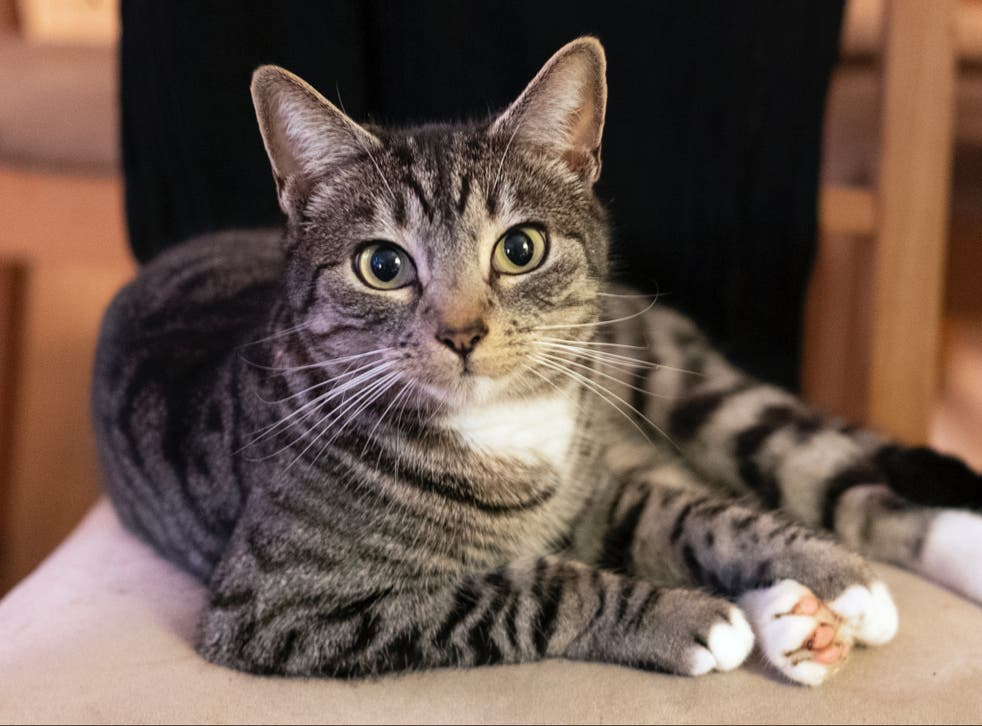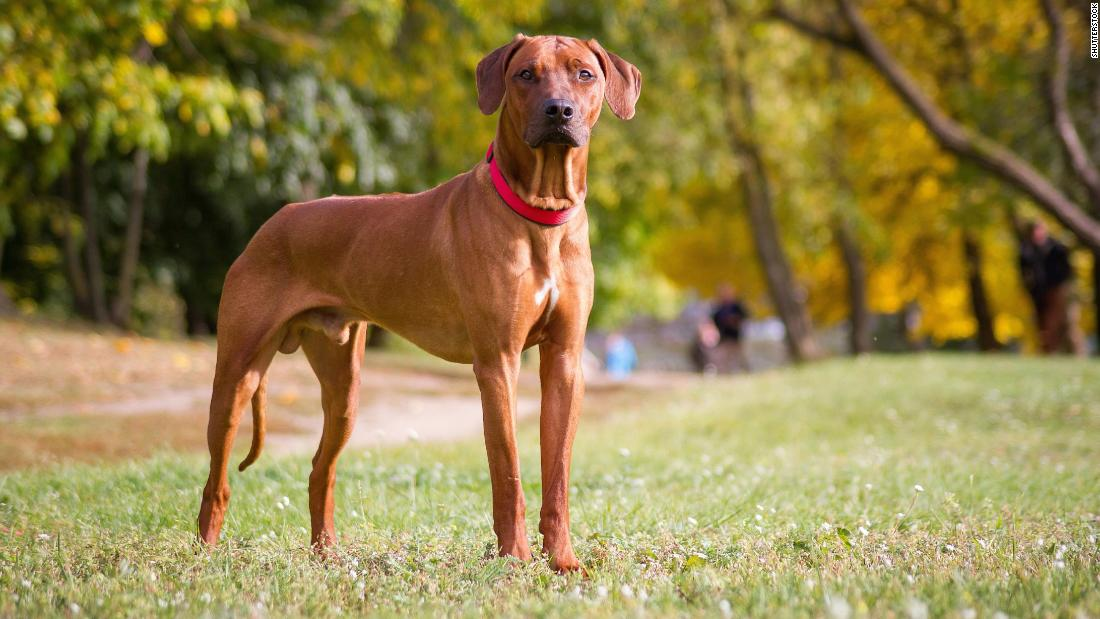

In [ ]:
sample_predict(cat), sample_predict(dog)

('Cat', 'Dog')

In [ ]:
ndog = '/drive/My Drive/Student Folder - Jamaine/Projects/Project 6/Data/Copy of dog.jpg'

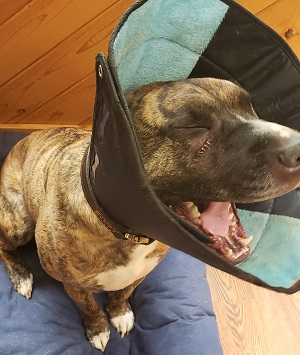

In [ ]:
sample_predict(ndog)

'Cat'

### **Next Steps**



*   Train CNN with more images of cats and dogs wearing accessories that obstruct telling features
*   Further tune hyperparamters

